In [5]:
%load_ext autoreload
%autoreload 2

# Sample use case for StormEnsembleExperiment
from pyrorb.config_manager import ConfigManager
from pyrorb.runner import ExperimentRunner
from pyrorb.experiments.base_experiment import BaseExperiment, read_file
from pathlib import Path


dataset_path = Path('/home/ashkan/Downloads/sana_rorb')
catg_file_path = dataset_path.glob('*.catg').__next__()
stm_file_paths = dataset_path.glob('*.stm')


Experiments = []

catg_data = read_file(catg_file_path)

for stm_file_path in stm_file_paths:
    stm_data = read_file(stm_file_path)
    for kc in [0.4, 0.5, 0.6]:  
        Experiments.append(BaseExperiment(catg_data, stm_data, kc=kc, m=1.2, il=10.0, cl=5.0))

runner = ExperimentRunner(experiments=Experiments)

runner.submit_batches()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from pyrorb.tools.kc_calibration import kc_calibration


catg_data = read_file(catg_file_path)
stm_file_paths = list(dataset_path.glob('*.stm'))
stm_data_list = [read_file(stm_file_path) for stm_file_path in stm_file_paths]

kc_q_mapping = kc_calibration(catg_data, stm_data_list, kc_range=[0.4, 0.5, 0.6], m=1.2, il=10.0, cl=5.0)

kc_q_mapping

{'Hyd001': {'peak': [4.4295, 3.923, 3.6356],
  'critical_duration': ['30 min', '1 hour', '1 hour'],
  'critical_pattern': ['ARR2016 pattern, 26 (point temporal patterns)',
   'ARR2016 pattern, 28 (point temporal patterns)',
   'ARR2016 pattern, 28 (point temporal patterns)'],
  'kc': [0.4, 0.5, 0.6]},
 'Hyd002': {'peak': [6.8886, 6.0342, 5.4789],
  'critical_duration': ['1 hour', '1.5 hour', '1.5 hour'],
  'critical_pattern': ['ARR2016 pattern, 27 (point temporal patterns)',
   'ARR2016 pattern, 27 (point temporal patterns)',
   'ARR2016 pattern, 28 (point temporal patterns)'],
  'kc': [0.4, 0.5, 0.6]}}

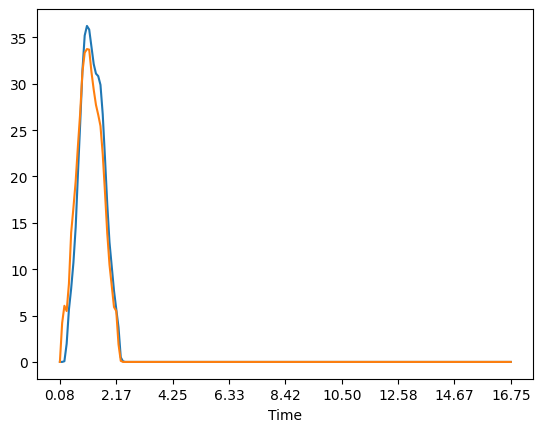

In [6]:
for exp in ensemble_exp.experiments:
    hydrograph = exp.result.hydrographs['Hyd007']
    hydrograph.plot()